In [138]:
import cv2 as cv

In [139]:
from deepface import DeepFace

In [140]:
img = cv.imread('assets/boy_smile.jpg')

In [141]:
import matplotlib.pyplot as plt

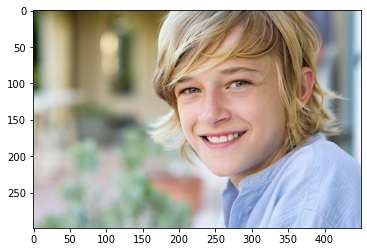

In [142]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [143]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.45it/s]


In [144]:
predictions

{'region': {'x': 186, 'y': 34, 'w': 153, 'h': 186},
 'emotion': {'angry': 3.3503822410635084e-12,
  'disgust': 2.3613334695010394e-16,
  'fear': 7.957575931527572e-07,
  'happy': 99.99979734420776,
  'sad': 4.158156111100375e-09,
  'surprise': 3.737044562690528e-08,
  'neutral': 0.00020803040570172016},
 'dominant_emotion': 'happy',
 'age': 27,
 'gender': 'Man',
 'race': {'asian': 7.39043741759815e-05,
  'indian': 2.814924471294944e-06,
  'black': 1.9735571510359762e-08,
  'white': 99.9009370803833,
  'middle eastern': 0.014281638141255826,
  'latino hispanic': 0.08470622124150395},
 'dominant_race': 'white'}

In [145]:
predictions['dominant_emotion']

'happy'

In [146]:
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [147]:
face_cascade

<CascadeClassifier 0000020D2CBB6810>

In [148]:
face = face_cascade.detectMultiScale(cv.cvtColor(img, cv.COLOR_BGR2GRAY), 1.3, 5)

In [149]:
face

array([[164,  40, 175, 175]], dtype=int32)

In [154]:
for x, y, w, h in face:
    face_img = img[y:y+h, x:x+w]
    predictions = DeepFace.analyze(face_img, actions=['emotion'])
    img = cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    img = cv.putText(img, str(predictions['dominant_emotion']), (x, y+h+20),
                    cv.FONT_HERSHEY_COMPLEX, .7, (0, 0, 0), 1)
    img = cv.putText(img, str(predictions['dominant_race']), (x, y+h+40),
                    cv.FONT_HERSHEY_COMPLEX, .7, (0, 0, 0), 1)
    img = cv.putText(img, str(predictions['gender']), (x, y+h+60),
                    cv.FONT_HERSHEY_COMPLEX, .7, (0, 0, 0), 1)
    img = cv.putText(img, str(predictions['age']), (x, y+h+80),
                    cv.FONT_HERSHEY_COMPLEX, .7, (0, 0, 0), 1)
    

Action: race: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.72it/s]


In [155]:
predictions

{'region': {'x': 23, 'y': 0, 'w': 144, 'h': 184},
 'emotion': {'angry': 8.227580914080129e-17,
  'disgust': 3.2945139436474807e-24,
  'fear': 3.1288030569201917e-15,
  'happy': 99.99997615814209,
  'sad': 5.288397266623021e-14,
  'surprise': 1.104336760926472e-09,
  'neutral': 2.4230126882685e-05},
 'dominant_emotion': 'happy',
 'age': 28,
 'gender': 'Man',
 'race': {'asian': 8.242484028642139e-07,
  'indian': 1.872653143664138e-08,
  'black': 4.276804333857437e-11,
  'white': 99.9929428100586,
  'middle eastern': 0.0007247547273436794,
  'latino hispanic': 0.006328791641863063},
 'dominant_race': 'white'}

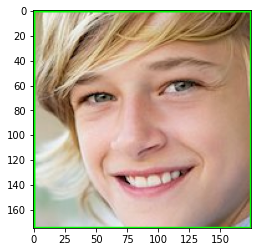

In [152]:
plt.imshow(cv.cvtColor(face_img, cv.COLOR_BGR2RGB))

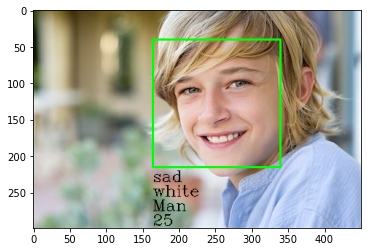

In [153]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))